# 项目：TMDb电影数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本文对TMDb电影数据进行了数据分析，选择了**预算**、**影片类型**和**档期**三个角度考察了其对电影数据的影响，同时进行了可视化处理并给出了初步结论。
数据级来自[TMDb电影数据 ——（已清洗Kaggle 的原始数据）](https://github.com/udacity/new-dand-basic-china/blob/master/%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%85%A5%E9%97%A8/%E9%A1%B9%E7%9B%AE-%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86/%E6%8E%A2%E7%B4%A2%E6%95%B0%E6%8D%AE%E9%9B%86%20-%20%E5%A4%87%E9%80%89%E6%95%B0%E6%8D%AE%E9%9B%86.md)


In [1]:
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## 数据整理

### 常规属性

In [2]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 数据预览

In [3]:
# 查看数据情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# 查看数据集数据缺失情况
null_df = df.isnull().sum()
null_df

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
null_df[null_df > 0].index

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [6]:
# 查看数据集数据重复情况
sum(df.duplicated())

1

**预览结论**
1. 数据集共10886条数据，共有一条重复数据
2. 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords','overview', 'genres', 'production_companies'以上数据列有空值数据
3. 'release_data'的数据类型为Object,需要调整

### 进一步观察数据

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


可以看到，'budget, 'revenue', 'runtime' 均出现了零值，这应该属于异常数据，下面具体看下这部分数据的数量情况

In [50]:
print((df.budget == 0).sum()) # 预算为0的数据数
print((df.revenue == 0).sum()) # 收入为0的数据数
print((df.runtime == 0).sum()) # 时长为0的数据数
len(df.query('budget > 0 and revenue > 0')) #排除预算或收入为0后的数据数

5674
5993
30


3854

### 数据清理方案设计
1. 删除重复数据
2. 'genres'的空值数据会影响后续对电影类型影响的分析，删除对应的行；其它数据空值对后续分析无影响，不做处理
3. 'budget, 'revenue'两个数据出现零值，正常来说一个上映的电影不应该出现预算为零以及收入为零的情况，在预算和票房有关的内容时需要忽略这些数据
4. 调整'release_data'的数据类型
5. 'genres'的数据类型实际为str,将其处理为一个记录分类标签的列表更方便后续数据分析

### 清理数据

`1` 删除重复数据

In [9]:
df.drop_duplicates(inplace = True) # 删除冗余数据

In [10]:
df.duplicated().sum()  # 检查删除结果

0

`2` 删除'gneres'为空值的行

In [11]:
df.dropna(subset=['genres'], inplace=True)

In [12]:
df.genres.isnull().sum()

0

In [13]:
df.shape

(10842, 21)

`3` 调整'release_data'的数据类型，并添加月份列为后续分析做准备

In [14]:
df.release_date = pd.to_datetime(df.release_date) # 转换数据类型
df['month'] = df.release_date.apply(lambda x: x.month)

In [15]:
df.info() # 检查结果

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 22 columns):
id                      10842 non-null int64
imdb_id                 10834 non-null object
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
original_title          10842 non-null object
cast                    10767 non-null object
homepage                2931 non-null object
director                10800 non-null object
tagline                 8036 non-null object
keywords                9367 non-null object
overview                10839 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null datetime64[ns]
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj       

<a id='eda'></a>
## 探索性数据分析

### 票房与预算和投资回报率(ROI)的变化趋势

In [16]:
df_select = df.query('budget > 0 and revenue > 0') #数据集中的数据移除零值预算和收入的数据
b_r = df_select.groupby('release_year')['budget_adj', 'revenue_adj'].mean() # 各年预算和收入的平均值数据
roi = (b_r.revenue_adj - b_r.budget_adj) / b_r.budget_adj # 计算各年的投资回报率

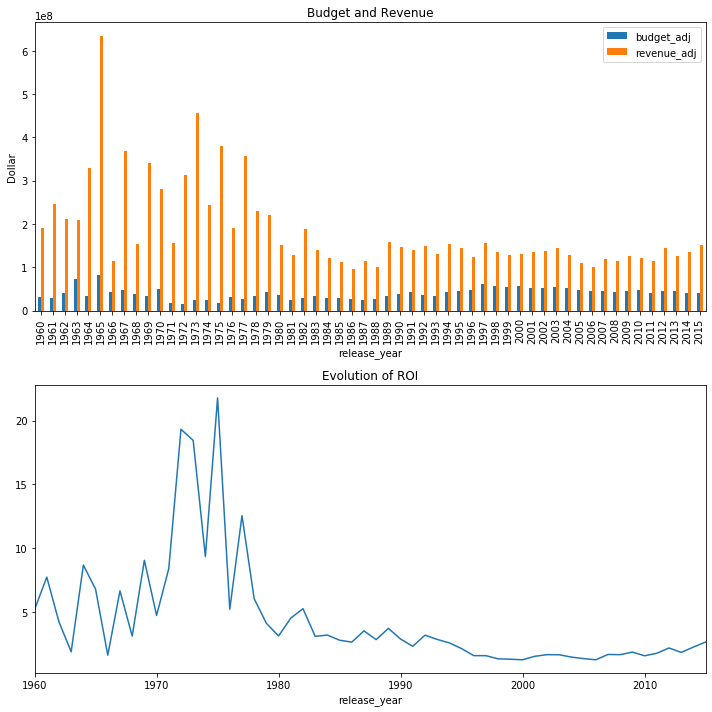

In [17]:
#画图展示以上数据
fig, axes = plt.subplots(2,1, figsize=(10,10))
b_r.iloc[:, 0:2].plot(kind='bar', ax=axes[0], title='Budget and Revenue')
axes[0].set_ylabel('Dollar')
roi.plot(ax=axes[1], title='Evolution of ROI')
fig.tight_layout()

### 电影类型的影响
1. 各电影类型的拍摄数量
2. 电影类型与票房的关系
3. 不同电影类型的评分情况

`1` 各电影类型的拍摄数量

In [18]:
# 用字典记录各类型的电影数量

count = {}
for row in df.genres.map(lambda x: x.split('|')):
    for i in row:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1

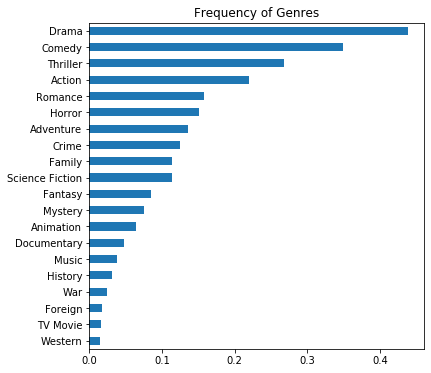

In [19]:
# 计算个电影的占比并画图
genres = pd.Series(count).sort_values()
genres_avg = genres / len(df)
genres_avg.plot(kind='barh', figsize=(6,6), title='Frequency of Genres');

`2`. 电影类型与票房的关系

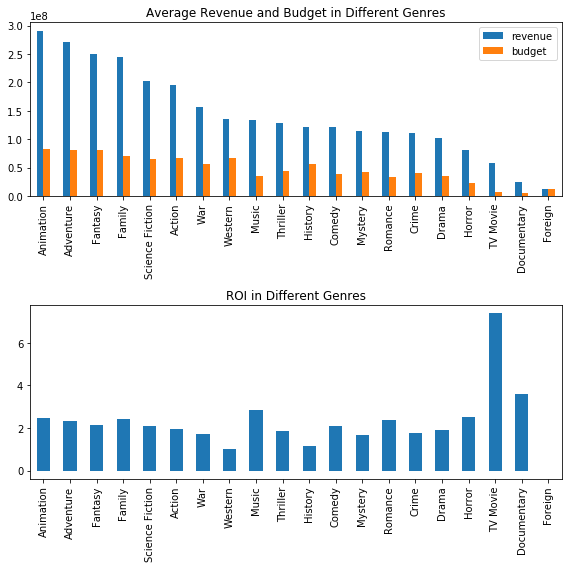

In [20]:
df_select = df.query('budget > 0 and revenue > 0') #数据集中的数据移除零值预算和收入的数据
movies_by_genres = pd.DataFrame(0, index = genres.index, columns=['revenue', 'budget', 'vote'])
for g in genres.index:
    movies_by_genres.loc[g, 'revenue'] = df_select[df_select['genres'].str.contains(g, regex=False)].revenue_adj.mean()
    movies_by_genres.loc[g, 'budget'] = df_select[df_select['genres'].str.contains(g, regex=False)].budget_adj.mean()
    movies_by_genres.loc[g, 'vote'] = df_select[df_select['genres'].str.contains(g, regex=False)].vote_average.mean()
movies_by_genres['roi'] =  (movies_by_genres.revenue - movies_by_genres.budget) / movies_by_genres.budget
  
#画图
fig, axes = plt.subplots(2,1, figsize=(8,8))
movies_by_genres.sort_values('revenue', ascending=False)[['revenue', 'budget']].plot(ax=axes[0], kind='bar', title='Average Revenue and Budget in Different Genres')
movies_by_genres.sort_values('revenue', ascending=False)['roi'].plot(ax=axes[1], kind='bar', title='ROI in Different Genres')
fig.tight_layout() 

`3`. 不同电影的评分情况

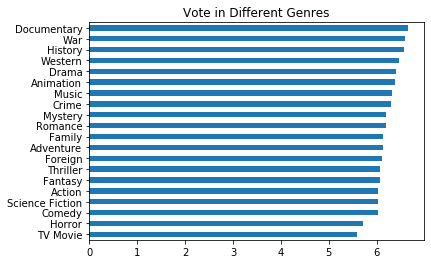

In [21]:
movies_by_genres.sort_values('vote').vote.plot(kind='barh', title = 'Vote in Different Genres');

### 档期的影响
1. 不同档期排片数量的分布情况
2. 档期对票房的影响
3. 档期与电影评分的关系

`1`.不同档期排片数量的分布情况

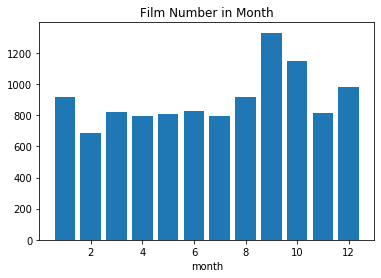

In [45]:
count_month = df.month.value_counts()
plt.bar(count_month.index, count_month.values)
plt.xlabel('month')
plt.title('Film Number in Month');

`2`. 档期对票房的影响

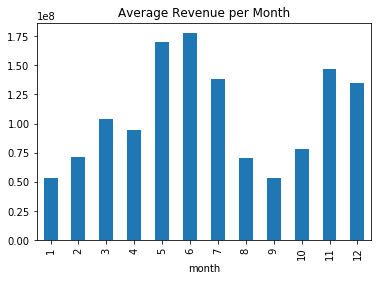

In [23]:
df_select = df.query('budget > 0 and revenue > 0') #数据集中的数据移除零值预算和收入的数据
revenue_month = df_select.groupby('month').revenue.mean()
revenue_month.plot(kind='bar', title='Average Revenue per Month');

`3`. 档期与电影评分的关系

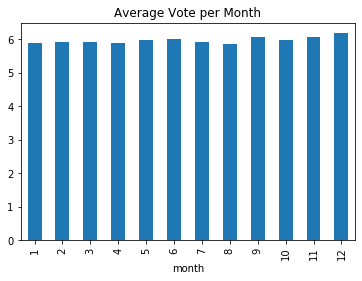

In [24]:
vote_month = df.groupby('month').vote_average.mean()
vote_month.plot(kind='bar', title='Average Vote per Month');

<a id='conclusions'></a>
## 结论

本文分别就**预算**、**影片类型**和**档期**三个变量对电影数据的影响进行了分析，从对应的图表中可以初步得到以下结论
### 从预算的影响来看
1. 在考虑通货膨胀影响后，从1960至2015年，电影的预算和票房在1965-1977年出现了一段短期的暴增，其它年份总体差异不大。
2. 电影的投资回报率也在同样在1965-1977年暴增，其它年份总体差异不大。

### 从影片类型来看
1. 剧情、戏剧、惊悚和动作片是最多出现的影片类型，西部片和TV电影的数量最少
2. 动画、冒险、奇幻和家庭类型的影片票房最高，TV电影、记录片和外语片的票房最少
3. 最高票房的电影类型的投资回报率处于平均水平，而TV电影和记录片的投资回报率是最高的

###  从档期的影响来看
1. 9、10两月的档期影片数量最多
2. 影片票房平均值最高的月份在5月和6月，而这两个月份的排片是最少的
3. 档期对电影的评分基本没有影响

### 结论的其它局限性
在分析与预算和收入相关的数据时， 排除了预算和收入为零的数据（最终数据量只剩下3854），由于排除的数量量较大，最终得到的数据结果可能会有偏差，需要进一步观察。

## 参考
[pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

[TMDb电影数据分析 & 电影评分预测](https://www.jianshu.com/p/9d7d56dadcc6)

[TMDB数据分析](https://zhuanlan.zhihu.com/p/62174002)